---
sidebar_label: Google Gemini
---

## ChatGoogleGenerativeAI (Gemini API & AI Studio)

Access Google's Generative AI models, including the Gemini family, directly via the Gemini API or experiment rapidly using Google AI Studio. The `langchain-google-genai` package provides the LangChain integration for these models. This is often the best starting point for individual developers.

For information on the latest models, their features, context windows, etc. head to the [Google AI docs](https://ai.google.dev/gemini-api/docs/models/gemini). All examples use the `gemini-2.0-flash` model. Gemini 2.5 Pro and 2.5 Flash can be used via  `gemini-2.5-pro-preview-03-25` and `gemini-2.5-flash-preview-04-17`. All model ids can be found in the [Gemini API docs](https://ai.google.dev/gemini-api/docs/models).

### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/docs/integrations/chat/google_generativeai) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatGoogleGenerativeAI](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) | [langchain-google-genai](https://python.langchain.com/api_reference/google_genai/index.html) | ❌ | beta | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-google-genai?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-google-genai?style=flat-square&label=%20) |

### Model features

| [Tool calling](/docs/how_to/tool_calling) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: | :---: | :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ | ✅ | ❌ | ✅ | ✅ | ✅ | ✅ | ✅ | ✅ | ❌ |

### Setup

To access Google AI models you'll need to create a Google Account, get a Google AI API key, and install the `langchain-google-genai` integration package.

**1. Installation:**

In [ ]:
%pip install -U langchain-google-genai

**2. Credentials:**

Head to [https://ai.google.dev/gemini-api/docs/api-key](https://ai.google.dev/gemini-api/docs/api-key) (or via Google AI Studio) to generate a Google AI API key.

### Chat Models

Use the `ChatGoogleGenerativeAI` class to interact with Google's chat models. See the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) for full details.


In [3]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

To enable automated tracing of your model calls, set your [LangSmith](https://docs.smith.langchain.com/) API key:

In [ ]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

## Instantiation

Now we can instantiate our model object and generate chat completions:

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Invocation

In [5]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-3b28d4b8-8a62-4e6c-ad4e-b53e6e825749-0', usage_metadata={'input_tokens': 20, 'output_tokens': 7, 'total_tokens': 27, 'input_token_details': {'cache_read': 0}})

In [6]:
print(ai_msg.content)

J'adore la programmation.


## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

In [7]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "German",
        "input": "I love programming.",
    }
)

AIMessage(content='Ich liebe Programmieren.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-e5561c6b-2beb-4411-9210-4796b576a7cd-0', usage_metadata={'input_tokens': 15, 'output_tokens': 7, 'total_tokens': 22, 'input_token_details': {'cache_read': 0}})

## Multimodal Usage

Gemini models can accept multimodal inputs (text, images, audio, video) and, for some models, generate multimodal outputs.

### Image Input

Provide image inputs along with text using a `HumanMessage` with a list content format. The `gemini-2.0-flash` model can handle images.

In [ ]:
import base64

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# Example using a public URL (remains the same)
message_url = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the image at the URL.",
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)
result_url = llm.invoke([message_url])
print(f"Response for URL image: {result_url.content}")

# Example using a local image file encoded in base64
image_file_path = "/Users/philschmid/projects/google-gemini/langchain/docs/static/img/agents_vs_chains.png"

with open(image_file_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

message_local = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the local image."},
        {"type": "image_url", "image_url": f"data:image/png;base64,{encoded_image}"},
    ]
)
result_local = llm.invoke([message_local])
print(f"Response for local image: {result_local.content}")

Other supported `image_url` formats:
- A Google Cloud Storage URI (`gs://...`). Ensure the service account has access.
- A PIL Image object (the library handles encoding).

### Audio Input

Provide audio file inputs along with text. Use a model like `gemini-2.0-flash`.

In [ ]:
import base64

from langchain_core.messages import HumanMessage

# Ensure you have an audio file named 'example_audio.mp3' or provide the correct path.
audio_file_path = "example_audio.mp3"
audio_mime_type = "audio/mpeg"


with open(audio_file_path, "rb") as audio_file:
    encoded_audio = base64.b64encode(audio_file.read()).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe the audio."},
        {
            "type": "media",
            "data": encoded_audio,  # Use base64 string directly
            "mime_type": audio_mime_type,
        },
    ]
)
response = llm.invoke([message])  # Uncomment to run
print(f"Response for audio: {response.content}")

### Video Input

Provide video file inputs along with text. Use a model like `gemini-2.0-flash`.

In [ ]:
import base64

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# Ensure you have a video file named 'example_video.mp4' or provide the correct path.
video_file_path = "example_video.mp4"
video_mime_type = "video/mp4"


with open(video_file_path, "rb") as video_file:
    encoded_video = base64.b64encode(video_file.read()).decode("utf-8")

message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the first few frames of the video."},
        {
            "type": "media",
            "data": encoded_video,  # Use base64 string directly
            "mime_type": video_mime_type,
        },
    ]
)
response = llm.invoke([message])  # Uncomment to run
print(f"Response for video: {response.content}")

### Image Generation (Multimodal Output)

The `gemini-2.0-flash` model can generate text and images inline (image generation is experimental). You need to specify the desired `response_modalities`.

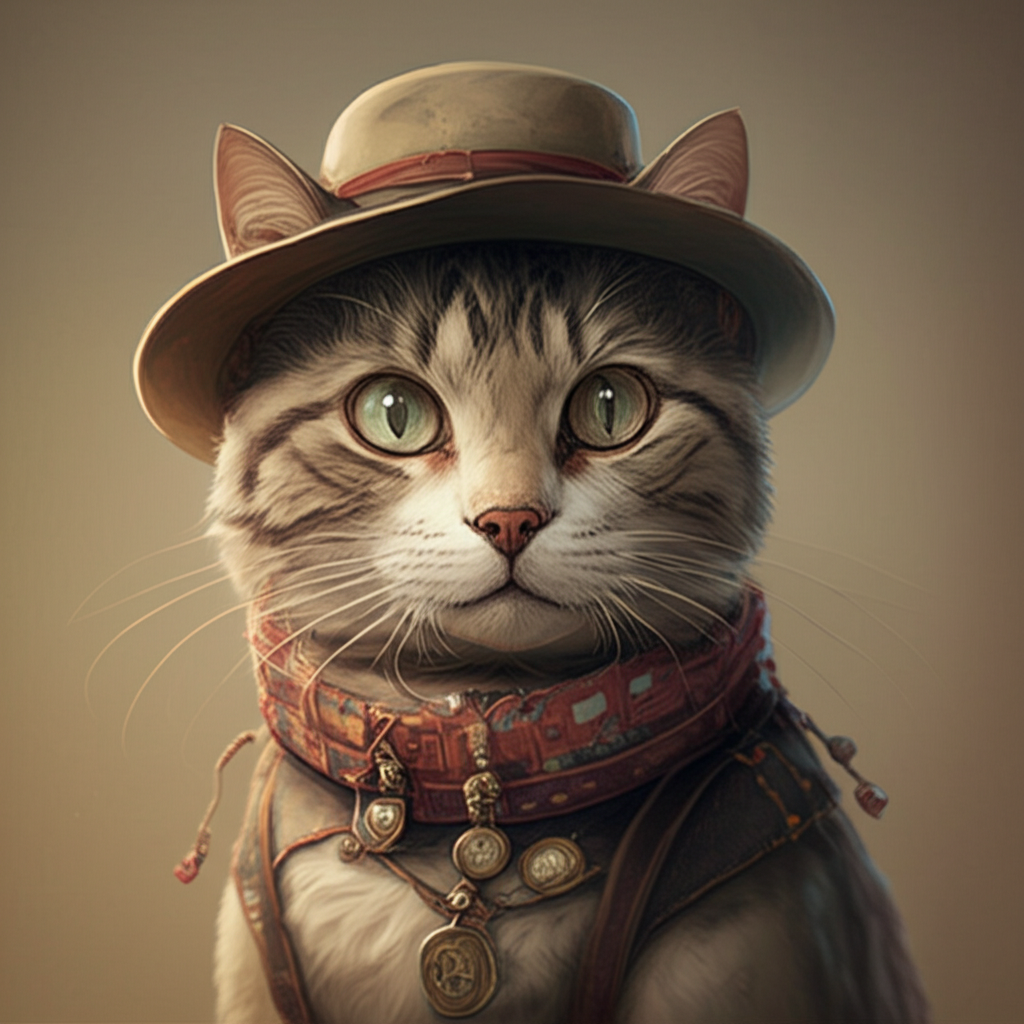

In [ ]:
import base64

from IPython.display import Image, display
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-exp-image-generation")

message = {
    "role": "user",
    "content": "Generate an image of a cuddly cat wearing a hat.",
}

response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

image_base64 = response.content[0].get("image_url").get("url").split(",")[-1]

image_data = base64.b64decode(image_base64)
display(Image(data=image_data, width=300))

### Image and text to image

You can iterate on an image in a multi-turn conversation, as shown below:

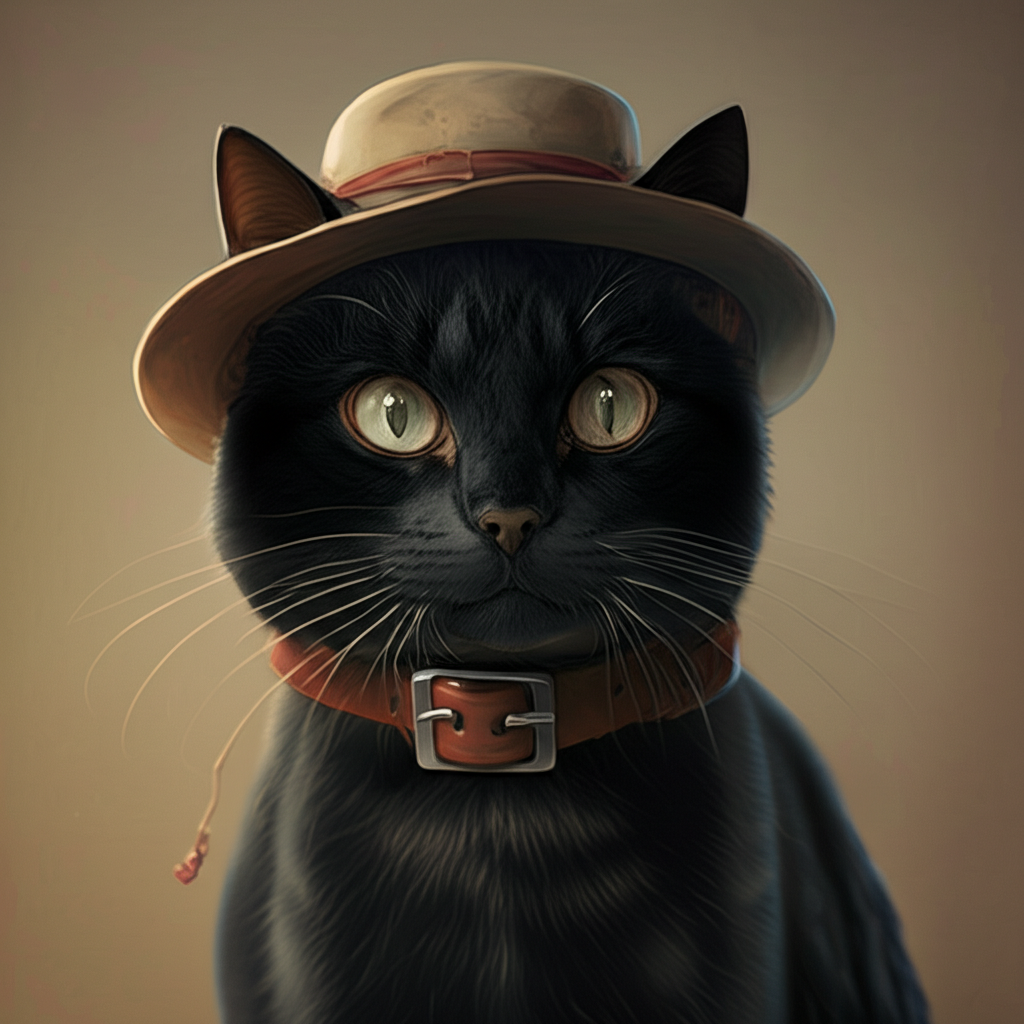

In [ ]:
next_message = {
    "role": "user",
    "content": "Can you take the same image and make the cat black?",
}

response = llm.invoke(
    [message, response, next_message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

image_base64 = response.content[0].get("image_url").get("url").split(",")[-1]

image_data = base64.b64decode(image_base64)
display(Image(data=image_data, width=300))

You can also represent an input image and query in a single message by encoding the base64 data in the [data URI scheme](https://en.wikipedia.org/wiki/Data_URI_scheme):

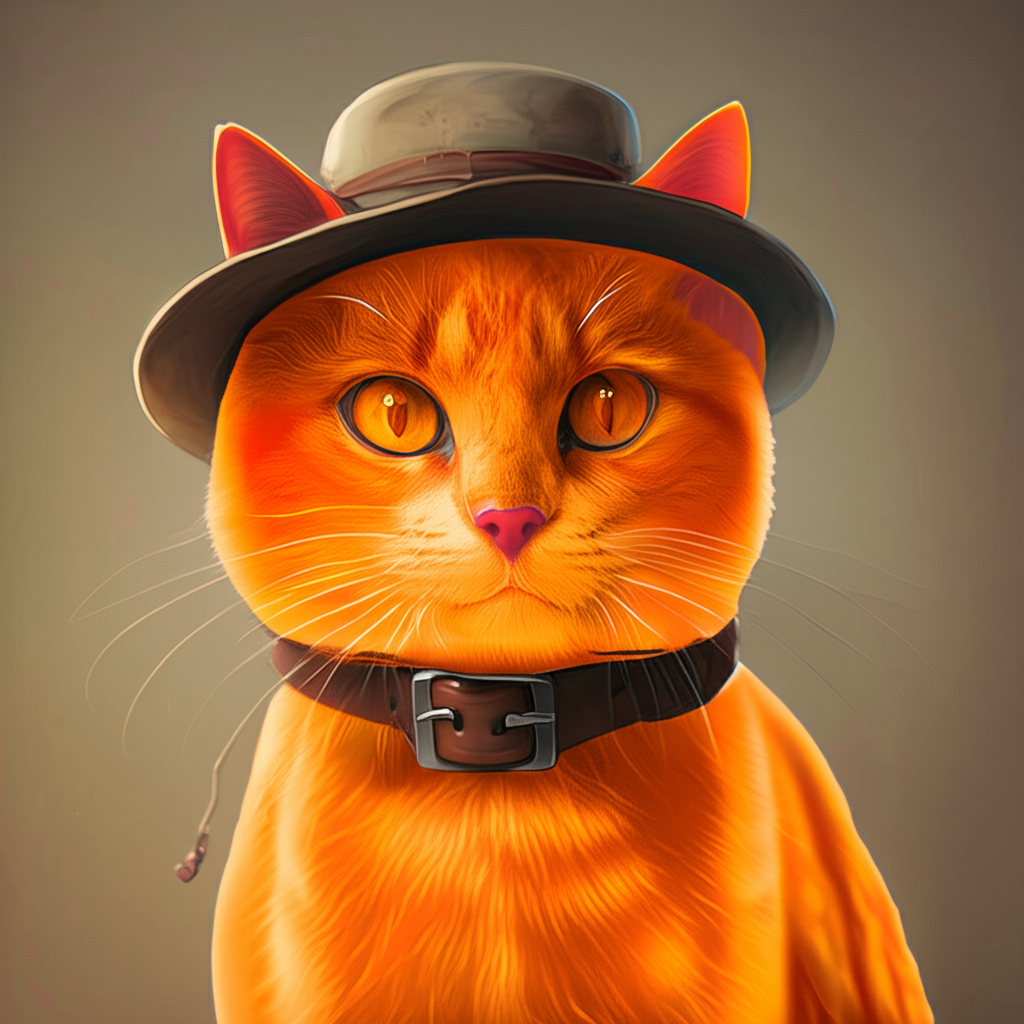

In [ ]:
message = {
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "Can you make this cat bright orange?",
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{image_base64}"},
        },
    ],
}

response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)
image_base64 = response.content[0].get("image_url").get("url").split(",")[-1]

image_data = base64.b64decode(image_base64)
display(Image(data=image_data, width=300))

You can also use LangGraph to manage the conversation history for you as in [this tutorial](/docs/tutorials/chatbot/).

## Tool Calling

You can equip the model with tools to call.

In [ ]:
from langchain_core.tools import tool
from langchain_google_genai import ChatGoogleGenerativeAI


# Define the tool
@tool(description="Get the current weather in a given location")
def get_weather(location: str) -> str:
    return "It's sunny."


# Initialize the model and bind the tool
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools([get_weather])

# Invoke the model with a query that should trigger the tool
query = "What's the weather in San Francisco?"
ai_msg = llm_with_tools.invoke(query)

# Check the tool calls in the response
print(ai_msg.tool_calls)

# Example tool call message would be needed here if you were actually running the tool
from langchain_core.messages import ToolMessage

tool_message = ToolMessage(
    content=get_weather(*ai_msg.tool_calls[0]["args"]),
    tool_call_id=ai_msg.tool_calls[0]["id"],
)
llm_with_tools.invoke([ai_msg, tool_message])  # Example of passing tool result back

[{'name': 'get_weather', 'args': {'location': 'San Francisco'}, 'id': 'a6248087-74c5-4b7c-9250-f335e642927c', 'type': 'tool_call'}]


AIMessage(content="OK. It's sunny in San Francisco.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run-ac5bb52c-e244-4c72-9fbc-fb2a9cd7a72e-0', usage_metadata={'input_tokens': 29, 'output_tokens': 11, 'total_tokens': 40, 'input_token_details': {'cache_read': 0}})

## Structured Output

Force the model to respond with a specific structure using Pydantic models.

In [14]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI


# Define the desired structure
class Person(BaseModel):
    """Information about a person."""

    name: str = Field(..., description="The person's name")
    height_m: float = Field(..., description="The person's height in meters")


# Initialize the model
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0)
structured_llm = llm.with_structured_output(Person)

# Invoke the model with a query asking for structured information
result = structured_llm.invoke(
    "Who was the 16th president of the USA, and how tall was he in meters?"
)
print(result)

name='Abraham Lincoln' height_m=1.93




## Token Usage Tracking

Access token usage information from the response metadata.

In [18]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

result = llm.invoke("Explain the concept of prompt engineering in one sentence.")

print(result.content)
print("\nUsage Metadata:")
print(result.usage_metadata)

Prompt engineering is the art and science of crafting effective text prompts to elicit desired and accurate responses from large language models.

Usage Metadata:
{'input_tokens': 10, 'output_tokens': 24, 'total_tokens': 34, 'input_token_details': {'cache_read': 0}}


## Built-in tools

Google Gemini supports a variety of built-in tools ([google search](https://ai.google.dev/gemini-api/docs/grounding/search-suggestions), [code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python)), which can be bound to the model in the usual way.

In [ ]:
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

resp = llm.invoke(
    "When is the next total solar eclipse in US?",
    tools=[GenAITool(google_search={})],
)

print(resp.content)

The next total solar eclipse visible in the United States will occur on August 23, 2044. However, the path of totality will only pass through Montana, North Dakota, and South Dakota.

For a total solar eclipse that crosses a significant portion of the continental U.S., you'll have to wait until August 12, 2045. This eclipse will start in California and end in Florida.


In [43]:
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

resp = llm.invoke(
    "What is 2*2, use python",
    tools=[GenAITool(code_execution={})],
)

for c in resp.content:
    if isinstance(c, dict):
        if c["type"] == "code_execution_result":
            print(f"Code execution result: {c['code_execution_result']}")
        elif c["type"] == "executable_code":
            print(f"Executable code: {c['executable_code']}")
    else:
        print(c)

Executable code: print(2*2)

Code execution result: 4

2*2 is 4.


/Users/philschmid/projects/google-gemini/langchain/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:580: UserWarning: 
        ⚠️ Warning: Output may vary each run.  
        - 'executable_code': Always present.  
        - 'execution_result' & 'image_url': May be absent for some queries.  

        Validate before using in production.

  warnings.warn(


## Native Async

Use asynchronous methods for non-blocking calls.

In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")


async def run_async_calls():
    # Async invoke
    result_ainvoke = await llm.ainvoke("Why is the sky blue?")
    print("Async Invoke Result:", result_ainvoke.content[:50] + "...")

    # Async stream
    print("\nAsync Stream Result:")
    async for chunk in llm.astream(
        "Write a short poem about asynchronous programming."
    ):
        print(chunk.content, end="", flush=True)
    print("\n")

    # Async batch
    results_abatch = await llm.abatch(["What is 1+1?", "What is 2+2?"])
    print("Async Batch Results:", [res.content for res in results_abatch])


await run_async_calls()

Async Invoke Result: The sky is blue due to a phenomenon called **Rayle...

Async Stream Result:
The thread is free, it does not wait,
For answers slow, or tasks of fate.
A promise made, a future bright,
It moves ahead, with all its might.

A callback waits, a signal sent,
When data's read, or job is spent.
Non-blocking code, a graceful dance,
Responsive apps, a fleeting glance.

Async Batch Results: ['1 + 1 = 2', '2 + 2 = 4']


## Safety Settings

Gemini models have default safety settings that can be overridden. If you are receiving lots of "Safety Warnings" from your models, you can try tweaking the `safety_settings` attribute of the model. For example, to turn off safety blocking for dangerous content, you can construct your LLM as follows:

In [ ]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

For an enumeration of the categories and thresholds available, see Google's [safety setting types](https://ai.google.dev/api/python/google/generativeai/types/SafetySettingDict).

## API reference

For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the API reference: https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html